In [1]:
from networkx.readwrite import json_graph
import pickle, json
import networkx as nx
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
'''保存graph和各种list'''
save_path = r"D:\vscode_workspace\ZhongYiPapers\network\data"

# 保存图
with open(save_path + r'\G.pkl', 'rb') as f:
    G = pickle.load(f)
with open(save_path + r'\graphs_per_year.pkl', 'rb') as f:
    graphs_per_year = pickle.load(f)

with open(save_path + r'\name_list.pkl', 'rb') as f:
    name_list = pickle.load(f)
with open(save_path + r'\name_dict_list.pkl', 'rb') as f:
    name_dict_list = pickle.load(f)
with open(save_path + r'\name_dict_id_list.pkl', 'rb') as f:
    name_dict_id_list = pickle.load(f)
with open(save_path + r'\affiliation_set.pkl', 'rb') as f:
    affiliation_set = pickle.load(f)
with open(save_path + r'\uid_nameId_list.pkl', 'rb') as f:
    uid_nameId_list = pickle.load(f)
with open(save_path + r'\affiliation_dict.pkl', 'rb') as f:
    affiliation_dict = pickle.load(f)
with open(save_path + r'\affiliation_list.pkl', 'rb') as f:
    affiliation_list = pickle.load(f)
with open(save_path + r'\affiliation_id_list.pkl', 'rb') as f:
    affiliation_id_list = pickle.load(f)

'''读取MetaData'''
MetaData_path = r"D:\vscode_workspace\database\MetaData.json"
with open(MetaData_path, 'r', encoding='utf-8') as f:
    MetaData = json.load(f)

In [3]:
class Addable_Graph(nx.Graph):
    def __add__(self, other):
        # Implement the addition logic here
        res = self.copy()
        for node in other.nodes:
            if node not in res.nodes:
                res.add_node(node)
            else:
                # res.nodes[node]['affiliation_list'] = name_dict_list[index]
                res.nodes[node]['paper_num'] += other.nodes[node]['paper_num']
                res.nodes[node]['citation'] += other.nodes[node]['citation']
                res.nodes[node]['years'].update(res.nodes[node]['years'])
        for edge in other.edges:
            if edge not in res.edges:
                res.add_edge(edge[0], edge[1], papers=other.edges[edge]['papers'], paper_num_weight=other.edges[edge]['paper_num_weight'], citation_weight=other.edges[edge]['citation_weight'])
            else:
                res[edge[0]][edge[1]]['papers'].update(other[edge[0]][edge[1]]['papers'])
                res[edge[0]][edge[1]]['paper_num_weight'] += other[edge[0]][edge[1]]['paper_num_weight']
                res[edge[0]][edge[1]]['citation_weight'] += other[edge[0]][edge[1]]['citation_weight']
        return res

    def __iadd__(self, other):
        # Implement the addition logic here
        for node in other.nodes:
            if node not in self.nodes:
                self.add_node(node)
            else:
                # res.nodes[node]['affiliation_list'] = name_dict_list[index]
                self.nodes[node]['paper_num'] += other.nodes[node]['paper_num']
                self.nodes[node]['citation'] += other.nodes[node]['citation']
                self.nodes[node]['years'].update(self.nodes[node]['years'])
        for edge in other.edges:
            if edge not in self.edges:
                self.add_edge(edge[0], edge[1], papers=other.edges[edge]['papers'], paper_num_weight=other.edges[edge]['paper_num_weight'], citation_weight=other.edges[edge]['citation_weight'])
            else:
                self[edge[0]][edge[1]]['papers'].update(other[edge[0]][edge[1]]['papers'])
                self[edge[0]][edge[1]]['paper_num_weight'] += other[edge[0]][edge[1]]['paper_num_weight']
                self[edge[0]][edge[1]]['citation_weight'] += other[edge[0]][edge[1]]['citation_weight']
        return self

class Sum_Graph(Addable_Graph):
    def __init__(self, G=None, graphs_per_year=None):
        if graphs_per_year and G:
            super().__init__(G)
            self.graphs_per_year = [Addable_Graph(graph) for graph in graphs_per_year]
            self.y0 = 1980
        else:
            pass

    def year(self, year0, year1=None):
        '''单个年份返回的是引用，多个年份返回的是新建的图'''
        res = self.graphs_per_year[year0-self.y0]
        if year1 and year1 > year0:
            res = res.copy()
            for year in range(year0+1, year1+1):
                res += self.graphs_per_year[year-self.y0]
            return res
        return res

    def affiliation(self, affiliation):
        return self.subgraph(affiliation_id_list[affiliation_dict[affiliation]])

In [4]:
graph_G = Sum_Graph(G, graphs_per_year)

In [5]:
'''删除所有孤立节点'''
isolated_nodes = [node for node in G.nodes() if G.degree(node) == 0]
G_raw = G.copy()
G.remove_nodes_from(isolated_nodes)

{1: 844743, 2: 183292, 4: 24780, 5: 12557, 3: 48824, 8: 3070, 6: 7294, 7: 4399, 9: 2139, 10: 1576, 11: 1109, 38: 12, 39: 8, 69: 1, 14: 478, 13: 611, 12: 838, 16: 291, 40: 13, 15: 369, 19: 175, 52: 5, 17: 217, 21: 103, 24: 76, 20: 148, 87: 1, 26: 77, 171: 1, 27: 51, 18: 225, 28: 42, 45: 9, 33: 14, 22: 103, 25: 51, 23: 105, 30: 27, 29: 30, 34: 17, 44: 3, 42: 8, 46: 5, 85: 1, 55: 1, 41: 13, 32: 22, 57: 4, 90: 1, 35: 6, 36: 15, 31: 20, 84: 1, 47: 3, 50: 4, 54: 2, 89: 1, 76: 1, 37: 12, 51: 7, 68: 1, 60: 2, 91: 1, 59: 3, 48: 2, 49: 5, 43: 6, 77: 1, 56: 1, 66: 2, 53: 2, 67: 3, 62: 2, 103: 1, 136: 1, 75: 1, 72: 1, 96: 1, 61: 1, 65: 1, 64: 2}


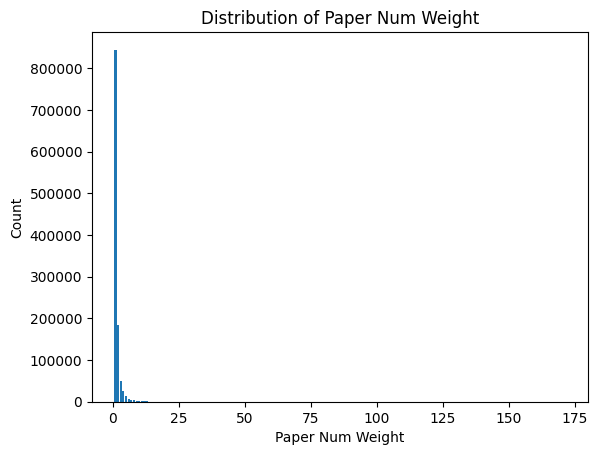

In [6]:
paper_num_weight = [G.edges[edge]['paper_num_weight'] for edge in G.edges()]
paper_num_weight_counts = Counter(paper_num_weight)

paper_num_weight_distribution = dict(paper_num_weight_counts)
print(paper_num_weight_distribution)

plt.bar(paper_num_weight_distribution.keys(), paper_num_weight_distribution.values())
plt.xlabel('Paper Num Weight')
plt.ylabel('Count')
plt.title('Distribution of Paper Num Weight')
plt.show()

{0: 134771, 1: 90116, 2: 86311, 3: 67258, 4: 61082, 5: 51861, 6: 50883, 7: 45489, 8: 54525, 9: 33490, 10: 35496, 11: 26766, 12: 26308, 13: 22541, 14: 23455, 15: 19017, 16: 18605, 17: 17819, 18: 15916, 19: 13443, 20: 16020, 21: 10701, 22: 12008, 23: 12445, 24: 10156, 25: 7688, 26: 8523, 27: 6749, 28: 7626, 29: 5426, 30: 6917, 31: 5304, 32: 4901, 33: 4815, 34: 4960, 35: 3985, 36: 4052, 37: 3915, 38: 4531, 39: 3001, 40: 3344, 41: 2994, 42: 3805, 43: 2631, 44: 3263, 45: 2461, 46: 2459, 47: 1919, 48: 2759, 49: 1840, 50: 3262, 51: 2746, 52: 2024, 53: 1814, 54: 2069, 55: 1476, 56: 1550, 57: 1596, 58: 1855, 59: 1194, 60: 1646, 61: 1114, 62: 1669, 63: 1059, 64: 1391, 65: 916, 66: 929, 67: 791, 68: 1139, 69: 815, 70: 1849, 71: 1002, 72: 811, 73: 785, 74: 1308, 75: 1488, 76: 837, 77: 1162, 78: 756, 79: 549, 80: 558, 81: 574, 82: 542, 83: 519, 84: 736, 85: 832, 86: 506, 87: 423, 88: 485, 89: 395, 90: 404, 91: 362, 92: 444, 93: 383, 94: 407, 95: 386, 96: 517, 97: 303, 98: 324, 99: 333, 100: 297, 10

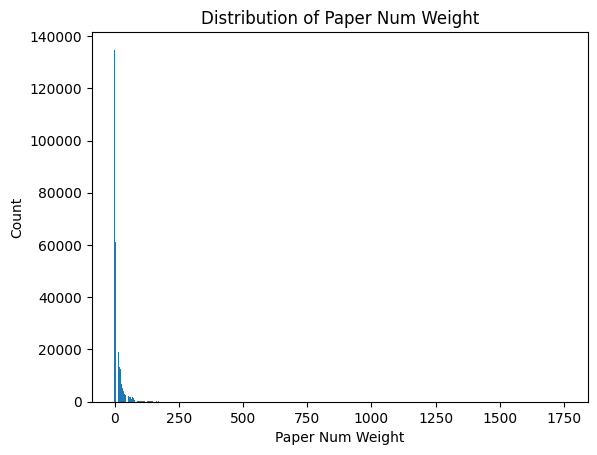

In [7]:
citation_weight = [G.edges[edge]['citation_weight'] for edge in G.edges()]
citation_weight_counts = Counter(citation_weight)

citation_weight_distribution = dict(citation_weight_counts)
sorted_citation_weight_distribution = dict(sorted(citation_weight_distribution.items(), key=lambda x: x[0]))
print(sorted_citation_weight_distribution)

plt.bar(sorted_citation_weight_distribution.keys(), sorted_citation_weight_distribution.values())
plt.xlabel('Paper Num Weight')
plt.ylabel('Count')
plt.title('Distribution of Paper Num Weight')
# Adjust window size based on maximum values of x-axis and y-axis
# plt.xlim(0, max(sorted_citation_weight_distribution.keys()))
# plt.ylim(0, max(sorted_citation_weight_distribution.values()))
plt.show()

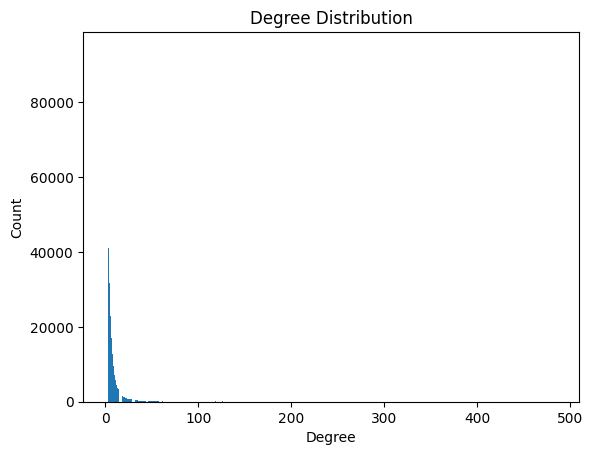

In [8]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = {}
for degree in degree_sequence:
    degree_count[degree] = degree_count.get(degree, 0) + 1

degrees = list(degree_count.keys())
counts = list(degree_count.values())

plt.bar(degrees, counts)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution')
plt.show()

In [9]:
'''引用量最大的连边'''
# import heapq
# n = 10
# nth_largest_edges = heapq.nlargest(n, G.edges(), key=lambda edge: G[edge[0]][edge[1]]['citation_weight'])
# max_edge = nth_largest_edges[1]
# max_citation_weight = G.edges[max_edge]['citation_weight']
# node1, node2 = max_edge

# print(f"Edge: {max_edge}")
# cite = {}
# for uid in G.edges[max_edge]['papers']:
#     if MetaData[1][uid]['year'] not in cite:
#         cite[MetaData[1][uid]['year']] = [MetaData[1][uid]['citation']]
#     else:
#         cite[MetaData[1][uid]['year']].append(MetaData[1][uid]['citation'])
#     # print(G.edges[max_edge]['papers'][uid])
# cite = dict(sorted(cite.items(), key=lambda x: x[0]))
# for key, value in cite.items():
#     print(key, value)
# print(G.edges[max_edge]['paper_num_weight'])
# print(G.edges[max_edge]['citation_weight'])
# print(f"Sum of citation_weight: {max_citation_weight}")
# print(f"Nodes: {node1}, {node2}")
# print("Node 1 information:")
# print(G.nodes[node1])
# print("Node 2 information:")
# print(G.nodes[node2])


'引用量最大的连边'

In [10]:
'''引用量最大的n个节点'''
# top_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]['citation'], reverse=True)[:100]
# for node in top_nodes:
#     print(node)

'引用量最大的n个节点'

In [11]:
'''引用量最大的节点的文章'''
# n = 12284
# node_edges = []
# for edge in G.edges():
#     if n in edge:
#         node_edges.append(edge)
#         print(f"Edge: {edge}")
#         print(G.edges[edge])
#         print(MetaData[1][list(G.edges[edge]['papers'].keys())[0]])
#         print(f"Nodes: {edge[0]}, {edge[1]}")
#         print(G.nodes[edge[0]])
#         print(G.nodes[edge[1]])
#         print()

'引用量最大的节点的文章'

In [12]:
'''统计年份以及年份的分布'''
year_counts = Counter([data['year'] for data in MetaData[1].values()])
print(sorted(list(year_counts.keys())))
sorted_year_counts = dict(sorted(year_counts.items(), key=lambda x: x[0], reverse=True))
for year, count in sorted_year_counts.items():
    print(year, count)
articles = [article for article in MetaData[1].values() if article['year'] < 2000 or article['year'] > 2024]
for article in articles:
    print(article['year'],article)

[1960, 1962, 1966, 1967, 1976, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2038, 2046, 2066, 2082, 2083]
2083 4
2082 2
2066 1
2046 39
2038 1
2024 8
2023 1725
2022 34417
2021 35580
2020 35338
2019 33915
2018 33244
2017 33820
2016 34268
2015 34911
2014 36009
2013 35043
2012 32452
2011 29595
2010 27302
2009 1317
2008 1141
2007 884
2006 723
2005 533
2004 423
2003 219
2002 225
2001 186
2000 219
1999 178
1998 135
1997 135
1996 165
1995 145
1994 124
1993 86
1992 60
1991 51
1990 51
1989 48
1988 44
1987 50
1986 34
1985 42
1984 41
1983 22
1982 16
1981 25
1980 29
1976 131
1967 1
1966 1
1962 1
1960 6
1988 {'title': '中药性能与金属元素含量', 'authors': ['陈和利1', '刘晓瑜2'], 'affiliations': ['江西中医学院', '江西省卫校'], 'journal': '中草药杂志', 'keywords': [], 'source': '江西中医学院；江西省卫校\xa0\xa01988\xa0\xa0第4期

In [14]:
'''度数最大的n个节点'''
n = 1000
top_n_nodes = sorted(list(graph_G.nodes()), key=lambda x: graph_G.degree(x), reverse=True)[:n]
for node in top_n_nodes:
    print(name_list[node], graph_G.degree(node), G.nodes[node]['affiliation_list'])

谢雁鸣 485 ['中国中医科学院中医临床基础医学研究所']
秦雪梅 445 ['山西大学中医药现代研究中心']
张伯礼 392 ['天津中医药大学']
刘建平 351 ['北京中医药大学循证医学中心']
杨关林 349 ['辽宁中医药大学']
胡思源 332 ['天津中医药大学第一附属医院']
常小荣 296 ['湖南中医药大学针灸推拿学院']
毛德文 285 ['广西中医药大学第一附属医院']
张艺 280 ['成都中医药大学民族医药学院']
郭义 276 ['天津中医药大学']
刘清泉 275 ['首都医科大学附属北京中医医院']
马融 272 ['天津中医药大学第一附属医院']
何清湖 267 ['湖南中医药大学']
孙蓉 258 ['山东省中医药研究院']
石岩 257 ['辽宁中医药大学']
常小荣 257 ['湖南中医药大学']
谢春光 255 ['成都中医药大学附属医院']
梁繁荣 253 ['成都中医药大学']
王伟 253 ['北京中医药大学']
孙忠人 253 ['黑龙江中医药大学']
康廷国 252 ['辽宁中医药大学药学院']
张允岭 252 ['北京中医药大学东方医院']
梁繁荣 252 ['成都中医药大学针灸推拿学院']
刘铜华 246 ['北京中医药大学']
陆兔林 236 ['南京中医药大学药学院']
于春泉 235 ['天津中医药大学']
仝小林 230 ['中国中医科学院广安门医院']
章薇 229 ['湖南中医药大学第一附属医院']
马贤德 228 ['辽宁中医药大学']
李新民 228 ['天津中医药大学第一附属医院']
王雪峰 226 ['辽宁中医药大学附属医院']
雷海民 223 ['北京中医药大学中药学院']
张俊华 219 ['天津中医药大学']
商洪才 217 ['北京中医药大学东直门医院']
郭蓉娟 216 ['北京中医药大学东方医院']
吴效科 215 ['黑龙江中医药大学附属第一医院']
倪健 213 ['北京中医药大学中药学院']
吕圭源 212 ['浙江中医药大学']
杨忠奇 211 ['广州中医药大学第一附属医院']
王庆国 208 ['北京中医药大学']
徐伟 208 ['福建中医药大学药学院']
杜守颖 207 ['北京中医药大学中药学院']
周亚滨 207 ['黑龙江中医药大学附属第一医院']
刘

In [15]:
'''度数最大的n个节点的度数随年份的变化'''
degree_by_year = {}
for id in top_n_nodes:
    degree_by_year[name_list[id]] = {}
    for year in [2000+i for i in range(24)]:
        if id in graph_G.year(year):
            degree_by_year[name_list[id]][year] = graph_G.year(year).degree(id)
degree_by_year

{'谢雁鸣': {2009: 3,
  2010: 16,
  2011: 25,
  2012: 35,
  2013: 23,
  2014: 32,
  2015: 30,
  2016: 54,
  2017: 40,
  2018: 80,
  2019: 157,
  2020: 49,
  2021: 52,
  2022: 92},
 '秦雪梅': {2008: 3,
  2009: 10,
  2010: 13,
  2011: 16,
  2012: 26,
  2013: 20,
  2014: 32,
  2015: 49,
  2016: 44,
  2017: 69,
  2018: 81,
  2019: 60,
  2020: 104,
  2021: 48,
  2022: 40,
  2023: 24},
 '张伯礼': {2009: 3,
  2010: 70,
  2011: 37,
  2012: 30,
  2013: 39,
  2014: 20,
  2015: 23,
  2016: 16,
  2017: 16,
  2018: 61,
  2019: 10,
  2020: 56,
  2021: 34,
  2022: 70,
  2023: 1},
 '刘建平': {2021: 126},
 '杨关林': {2010: 3,
  2011: 33,
  2012: 15,
  2013: 41,
  2014: 41,
  2015: 24,
  2016: 60,
  2017: 58,
  2018: 67,
  2019: 83,
  2020: 85,
  2021: 65,
  2022: 68},
 '胡思源': {2010: 27,
  2011: 26,
  2012: 22,
  2013: 9,
  2014: 23,
  2015: 41,
  2016: 36,
  2017: 49,
  2018: 83,
  2019: 59,
  2020: 44,
  2021: 42,
  2022: 16},
 '常小荣': {2010: 31,
  2011: 37,
  2012: 22,
  2013: 48,
  2014: 43,
  2015: 32,
  2016: 42,


In [6]:
# 对graph_G进行社区划分
import community

'''最大连通子图'''
node_subset = []
for affiliation in affiliation_list:
    if '北京中医药大学' not in affiliation:
        continue
    node_subset.extend(affiliation_id_list[affiliation_dict[affiliation]])
raw_graph = G.subgraph(node_subset)
# raw_graph = G.subgraph(affiliation_id_list[affiliation_dict['北京中医药大学']])
# raw_graph = graph_G.affiliation('北京中医药大学')
max_connected_component = max(nx.connected_components(raw_graph), key=len)
print(len(max_connected_component), len(raw_graph.nodes()), type(max_connected_component))
max_connected_component_G = raw_graph.subgraph(max_connected_component)

partition = community.best_partition(max_connected_component_G)

20264 25050 <class 'set'>


In [7]:
# Print the number of communities
num_communities = len(set(partition.values()))
print("Number of communities:", num_communities)

Number of communities: 61


In [8]:
# 生成一个社区的字典，格式为{社区编号: [节点1, 节点2, ...]}
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)
communities

{0: [262154,
  786444,
  132050,
  1353,
  1354,
  1356,
  1357,
  1355,
  1368,
  1821,
  657256,
  132997,
  134455,
  3443,
  266283,
  135571,
  266751,
  266754,
  529055,
  136563,
  136764,
  5888,
  5889,
  5890,
  5891,
  5892,
  268308,
  268309,
  268310,
  268311,
  268312,
  268313,
  6370,
  530742,
  268752,
  531152,
  401225,
  794616,
  270526,
  270527,
  139623,
  401829,
  8873,
  271066,
  9248,
  9249,
  9250,
  665523,
  534992,
  534993,
  11060,
  11062,
  666930,
  404859,
  404860,
  143153,
  143154,
  667755,
  12411,
  12412,
  12413,
  274675,
  12606,
  12607,
  12608,
  275625,
  144787,
  144788,
  144789,
  538398,
  276642,
  145634,
  408355,
  540055,
  541328,
  541329,
  541480,
  279451,
  17507,
  17508,
  17509,
  17510,
  541901,
  411170,
  543827,
  676116,
  545078,
  21236,
  21241,
  21685,
  22303,
  22305,
  416717,
  286173,
  286193,
  548849,
  548850,
  679942,
  155833,
  287261,
  287262,
  418479,
  156527,
  25788,
  26648,
  

In [9]:
# Print the size of each community
community_sizes = {}
for node, community_id in partition.items():
    if community_id not in community_sizes:
        community_sizes[community_id] = 1
    else:
        community_sizes[community_id] += 1
print("Community sizes:", (list(community_sizes.values())))

Community sizes: [476, 746, 694, 403, 432, 893, 811, 457, 812, 900, 565, 127, 351, 863, 259, 579, 359, 299, 152, 540, 124, 169, 135, 257, 1442, 312, 277, 278, 197, 367, 217, 320, 230, 264, 278, 343, 367, 84, 73, 449, 234, 263, 128, 210, 315, 177, 277, 247, 366, 120, 176, 295, 82, 66, 140, 31, 84, 75, 36, 17, 24]


In [83]:
# Print the authors in each community
community_authors = {}
i = 0
for node, community_id in partition.items():
    i += 1
    if i > 5000:
        break
    author_name = name_list[node]
    if community_id not in community_authors:
        community_authors[community_id] = [author_name]
    else:
        community_authors[community_id].append(author_name)
# community_authors

In [10]:
'''计算每个社区的连边数量'''
community_edges = {}
for edge in max_connected_component_G.edges():
    node1, node2 = edge
    community1 = partition[node1]
    community2 = partition[node2]
    if community1 == community2:
        if community1 not in community_edges:
            community_edges[community1] = 1
        else:
            community_edges[community1] += 1
# community_edges

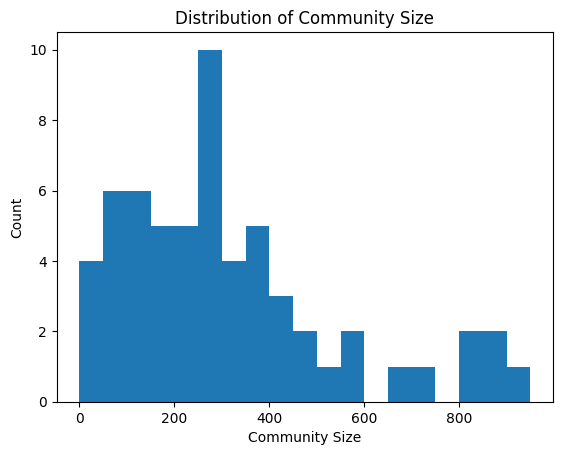

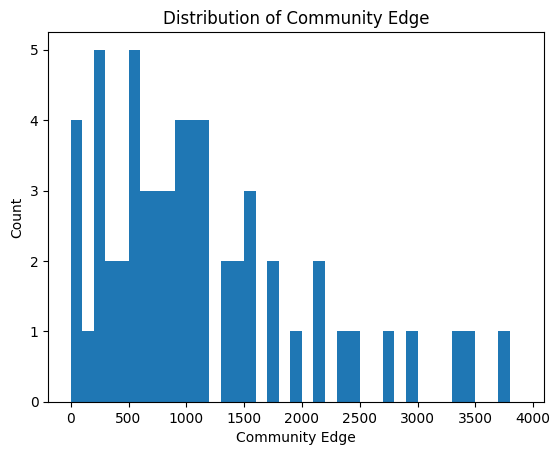

In [11]:
# 以50为一组，使用matplotlib画出community_sizes的分布直方图、累积分布图
import numpy as np
import matplotlib.pyplot as plt

# 计算每个社区的大小
community_sizes_list = list(community_sizes.values())
# 计算每个社区的连边数量
community_edges_list = list(community_edges.values())

# 画出社区大小的分布直方图
plt.hist(community_sizes_list, bins=range(0, 1000, 50))
plt.xlabel('Community Size')
plt.ylabel('Count')
plt.title('Distribution of Community Size')
plt.show()

# 画出社区连边数量的分布直方图
plt.hist(community_edges_list, bins=range(0, 4000, 100))
plt.xlabel('Community Edge')
plt.ylabel('Count')
plt.title('Distribution of Community Edge')
plt.show()

In [12]:
'''计算每个社区的连边数量随时间的变化'''
community_edges_by_year = {community: [] for community in communities.keys()}
for year in range(2000, 2023):
    G_year = graph_G.year(year)
    for community in communities.keys():
        community_edges_by_year[community].append(G_year.subgraph(communities[community]).number_of_edges())
community_edges_by_year

{0: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  86,
  113,
  109,
  208,
  142,
  122,
  137,
  70,
  136,
  319,
  298,
  377,
  324],
 1: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  59,
  114,
  171,
  200,
  177,
  283,
  198,
  267,
  224,
  287,
  556,
  437,
  598],
 2: [0,
  0,
  0,
  0,
  0,
  0,
  3,
  2,
  2,
  10,
  175,
  239,
  246,
  232,
  348,
  449,
  274,
  307,
  367,
  317,
  448,
  450,
  358],
 3: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  27,
  64,
  62,
  161,
  287,
  188,
  209,
  165,
  233,
  243,
  109,
  61,
  63],
 4: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  62,
  50,
  93,
  64,
  67,
  127,
  122,
  139,
  150,
  157,
  329,
  264,
  308],
 5: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  477,
  494,
  473,
  392,
  635,
  658,
  1015,
  564,
  134,
  153,
  74,
  108,
  45],
 17: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  160,
  247,
  187,
  407,
  696,
  730,
  582,
  722,
  596,
  388,
  555,
  513,
  357

In [95]:
'''统计每个社区中的作者的总的度数，以及该作者在社区中的度数'''
community_author_degree = {community: [] for community in communities.keys()}
a = 0
b = 0
for community in communities.keys():
    for node in communities[community]:
        a += graph_G.subgraph(communities[community]).degree(node)
        b += graph_G.degree(node)
        community_author_degree[community].append((graph_G.subgraph(communities[community]).degree(node), graph_G.degree(node)))
community_author_degree, a, b, a/b

({0: [(4, 9),
   (5, 5),
   (19, 21),
   (20, 22),
   (6, 6),
   (12, 16),
   (19, 29),
   (1, 2),
   (13, 18),
   (9, 11),
   (6, 6),
   (1, 1),
   (3, 3),
   (1, 1),
   (5, 5),
   (9, 11),
   (5, 5),
   (5, 5),
   (2, 2),
   (3, 3),
   (5, 5),
   (1, 1),
   (8, 8),
   (2, 2),
   (7, 7),
   (6, 6),
   (14, 16),
   (3, 4),
   (3, 3),
   (34, 70),
   (59, 105),
   (27, 50),
   (19, 27),
   (71, 152),
   (8, 8),
   (10, 11),
   (10, 11),
   (11, 12),
   (12, 14),
   (7, 7),
   (8, 16),
   (1, 2),
   (4, 5),
   (2, 2),
   (3, 3),
   (1, 1),
   (3, 4),
   (4, 5),
   (4, 5),
   (2, 7),
   (3, 3),
   (10, 18),
   (4, 4),
   (3, 9),
   (6, 6),
   (19, 21),
   (15, 17),
   (18, 22),
   (11, 13),
   (17, 17),
   (49, 67),
   (55, 65),
   (1, 1),
   (1, 1),
   (1, 1),
   (13, 13),
   (7, 7),
   (6, 6),
   (17, 57),
   (10, 27),
   (24, 38),
   (5, 6),
   (5, 5),
   (2, 2),
   (3, 3),
   (12, 12),
   (18, 20),
   (16, 19),
   (12, 14),
   (18, 19),
   (6, 8),
   (2, 3),
   (2, 3),
   (1, 1),
   (

In [105]:
# 统计每个社区的文章列表
community_papers = {community: set() for community in communities.keys()}
community_papers_names = {community: set() for community in communities.keys()}
for community in communities.keys():
    for node in communities[community]:
        for edge in graph_G.subgraph(communities[community]).edges(node):
            for uid in graph_G.subgraph(communities[community]).edges[edge]['papers']:
                if uid not in community_papers[community]:
                    community_papers[community].add(uid)
                    community_papers_names[community].add(MetaData[1][uid]['title'])
community_papers_names, {community: len(papers) for community, papers in community_papers.items()}

({0: {'"鸡尾酒"疗法治疗儿童原发免疫性血小板减少症临床疗效观察 ',
   '120例多原发肿瘤临床分析',
   '126例原发性骨髓增生异常综合征患者中医证候及用药分析 ',
   '167例进展期胃癌中医证型研究分析 ',
   '199例慢性荨麻疹患者兼夹体质类型的分布与演变规律',
   '260例慢性荨麻疹患者体质分布特点及变化倾向',
   '260例慢性荨麻疹患者体质分布特点及变化倾向 ',
   '318例寻常痤疮患者中医体质类型分析 ',
   '37例接受中医治疗的晚期胃癌死亡患者临床特征分析',
   '80例中晚期胃癌患者凝血指标及血瘀症状的临床分析 ',
   'HIV感染/AIDS患者合并带状疱疹的研究进展 ',
   '“从咽论治”探讨刺营放血法治疗寻常型银屑病血热证的机制',
   '“从脾论治方”对原发免疫性血小板减少症小鼠血管活性因子的影响',
   '“有胃气则生”理论在恶性血液病化疗患者中的应用',
   '“鸡尾酒”疗法治疗持续及慢性ITP儿童患者22例 ',
   '《中医血液病名词术语整理与诠释》研究思路探讨 ',
   '《理虚元鉴》“治虚三本”理论在慢性再生障碍性贫血中的运用',
   '《黄帝内经》“神”的内涵探析',
   '《黄帝内经》洞字与所涉病证探讨',
   '《黄帝内经》膈病探析',
   '三仁润肠方治疗功能性便秘60例',
   '不同的中医治疗方法联合规范化三阶梯疗法治疗癌性疼痛有效性的网状meta分析',
   '与银屑病相关的T辅助细胞研究进展 ',
   '中医“和法”的源流发展',
   '中医博士专业学位研究生教育调研分析',
   '中医时间医学基于现代生物节律在乳腺癌中的作用探讨',
   '中医治疗硬皮病最新研究进展 ',
   '中医治疗硬皮病研究进展 ',
   '中医治疗缺铁性贫血',
   '中医综合外治法治疗晚期恶性肿瘤合并胃痞理论及应用探讨',
   '中医肿瘤临证思考与发挥 ',
   '中医肿瘤学科现状分析与发展思路 ',
   '中医舌诊客观化研究',
   '中医药在安宁疗护中的应用 ',
   '中医药在急性髓系白血病（非M3）围诱导化疗期的应用与研究进展 ',
   '中医药在肿瘤康复中的临床应用',
   '中医药抗肿瘤多药耐药领域的守正创新研究

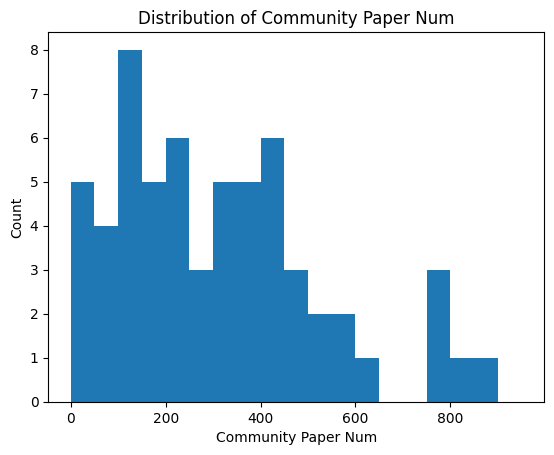

In [115]:
community_paper_num = {community: len(papers) for community, papers in community_papers.items()}
# 画出社区大小的分布直方图
plt.hist(list(community_paper_num.values()), bins=range(0, 1000, 50))
plt.xlabel('Community Paper Num')
plt.ylabel('Count')
plt.title('Distribution of Community Paper Num')
plt.show()

In [106]:
# 统计每个社区的文章的关键词列表
community_keywords = {community: {} for community in communities.keys()}
for community in communities.keys():
    for uid in community_papers[community]:
        for keyword in MetaData[1][uid]['keywords']:
            if keyword not in community_keywords[community]:
                community_keywords[community][keyword] = 1
            else:
                community_keywords[community][keyword] += 1
# {community: {keyword:times for keyword, times in } for community, keywords in community_keywords.items()}
for i in range(len(community_keywords)):
    # keywords格式为{keyword: times}，根据times排序
    keywords = {keyword: times for keyword, times in community_keywords[i].items()}
    sorted_keywords = dict(sorted(keywords.items(), key=lambda x: x[1], reverse=True))
    print(i, sorted_keywords)

0 {'中医药': 25, '免疫性血小板减少症': 21, '银屑病': 18, '胃癌': 17, '恶性肿瘤': 16, '中医': 15, '健脾益气摄血方': 13, '骨髓增生异常综合征': 12, '复方浙贝颗粒': 10, '原发免疫性血小板减少症': 10, '寻常型银屑病': 10, '免疫性血小板减少性紫癜': 10, '急性髓系白血病': 10, '肿瘤': 10, '中医证候': 9, '名医经验': 9, '网络药理学': 9, '化疗': 9, '乳腺癌': 9, '生活质量': 8, 'Meta分析': 8, '数据挖掘': 7, '儿童': 7, '外周血象': 7, '益髓颗粒': 7, '治疗': 7, '中医治疗': 7, '综述': 7, '血热证': 7, '中医证型': 6, '细胞凋亡': 6, '白血病干细胞': 6, '临床研究': 6, '肠胃舒胶囊': 6, '血管活性肠肽': 6, '慢性荨麻疹': 6, '难治性急性白血病': 6, '晚期胃癌': 6, '免疫功能': 6, '用药规律': 6, '五运六气': 5, '肺癌': 5, '非小细胞肺癌': 5, 'β-内啡肽': 5, '5-羟色胺': 5, '龙丹生血颗粒': 5, '骨髓抑制': 5, '中药': 5, '抑郁': 5, '多药耐药': 5, '临床经验': 5, '小鼠': 5, '便秘': 5, '乌梅丸': 5, '不良反应': 5, '从脾论治': 5, '偏头痛': 4, '复方阿胶浆': 4, '证候': 4, '中医药治疗': 4, '机制': 4, '癌性疼痛': 4, '凋亡': 4, '痤疮': 4, '偏颇体质': 4, '兼夹体质': 4, '新加良附方': 4, '作用机制': 4, '辨证论治': 4, '湿疹': 4, '陈信义': 4, '生命质量': 4, '斑马鱼': 4, '研究进展': 4, '针刺': 4, '细胞增殖': 4, '血液肿瘤': 4, '白血病细胞': 4, '急性淋巴细胞白血病': 4, '硬皮病': 4, '健脾益气摄血颗粒': 4, '内治法': 4, '癌因性疲乏': 4, '脾不统血': 4, '再生障碍性贫血': 4, '新加良附颗粒': 4, '三焦': 3, '生

In [26]:
# 获取社区中度数最大的n个节点
n = 5
top_n_nodes = {}
for community in communities.keys():
    top_n_nodes[community] = sorted(list(communities[community]), key=lambda x: graph_G.subgraph(communities[community]).degree(x), reverse=True)[:n]
# 最大n个节点的度数随年份的变化
degree_by_year = {}
for community in communities.keys():
    degree_by_year[community] = {}
    for year in [2000+i for i in range(23)]:
        for node in top_n_nodes[community]:
            if node in graph_G.year(year):
                if name_list[node] not in degree_by_year[community]:
                    degree_by_year[community][name_list[node]] = [0]*23
                degree_by_year[community][name_list[node]][year-2000] = graph_G.year(year).degree(node)
for community in communities.keys():
    print(community)
    print(community_edges_by_year[community])
    for node in top_n_nodes[community]:
        print(name_list[node], degree_by_year[community][name_list[node]])

0
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 86, 113, 109, 208, 142, 122, 137, 70, 136, 319, 298, 377, 324]
陈信义 [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 12, 10, 20, 11, 21, 33, 15, 28, 25, 24, 28, 32, 18]
张雅月 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 7, 6, 4, 3, 1, 13, 14, 26, 8, 29, 26]
侯丽 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 7, 0, 8, 20, 4, 17, 16, 21, 26, 26, 25]
张立山 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 2, 23, 5, 5, 1, 4, 8, 1, 2, 22, 30]
时晶 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 4, 7, 12, 6, 5, 13, 6, 9, 26, 4, 11, 6]
1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 59, 114, 171, 200, 177, 283, 198, 267, 224, 287, 556, 437, 598]
王庆国 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 56, 33, 25, 17, 32, 25, 24, 33, 16, 29, 24, 16]
王雪茜 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 9, 11, 9, 24, 33, 25, 23, 25, 24, 18, 24]
谷晓红 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 10, 21, 28, 11, 17, 7, 15, 18, 15, 30, 23, 26]
程发峰 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 6, 19, 14, 9, 18, 25, 20, 20]
翟双庆 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 13, 13, 24, 13, 7, 14, 12, 8,

In [27]:
# 将degree_by_year中同一社区中不同作者的数组相加
degree_by_year_sum = {}
for community in degree_by_year.keys():
    degree_by_year_sum[community] = [0]*23
    for tmp in degree_by_year[community].values():
        for i in range(len(tmp)):
            degree_by_year_sum[community][i] += tmp[i]
# for community in communities.keys():
#     degree_by_year_sum[community] = [0]*23
#     for tmp in community
#     for node in communities[community]:
#         degree_by_year_sum[community] = [x+y for x, y in zip(degree_by_year_sum[community], degree_by_year[community][node])]
for community in communities.keys():
    print(community)
    print(community_edges_by_year[community])
    print(degree_by_year_sum[community])
#     for node in top_n_nodes[community]:
#         print(name_list[node], degree_by_year[community][name_list[node]])
# degree_by_year_sum

0
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 86, 113, 109, 208, 142, 122, 137, 70, 136, 319, 298, 377, 324]
[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 25, 28, 43, 52, 44, 66, 34, 68, 72, 98, 68, 120, 105]
1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 59, 114, 171, 200, 177, 283, 198, 267, 224, 287, 556, 437, 598]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 35, 82, 76, 81, 61, 92, 91, 92, 95, 82, 136, 104, 110]
2
[0, 0, 0, 0, 0, 0, 3, 2, 2, 10, 175, 239, 246, 232, 348, 449, 274, 307, 367, 317, 448, 450, 358]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 112, 151, 124, 147, 214, 224, 166, 127, 66, 82, 109, 84, 55]
3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 27, 64, 62, 161, 287, 188, 209, 165, 233, 243, 109, 61, 63]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 29, 36, 47, 73, 61, 50, 71, 100, 89, 63, 13, 20]
4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 62, 50, 93, 64, 67, 127, 122, 139, 150, 157, 329, 264, 308]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 30, 31, 32, 28, 53, 41, 28, 26, 21, 42, 48, 47]
5
[0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 477, 494, 473, 392, 635, 658, 1015, 564, 134, 153, 74, 108,

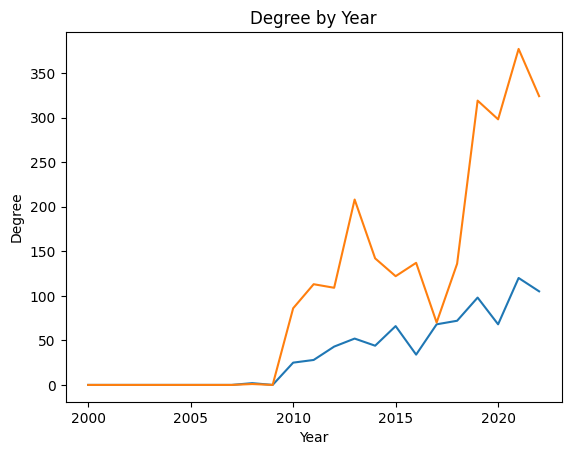

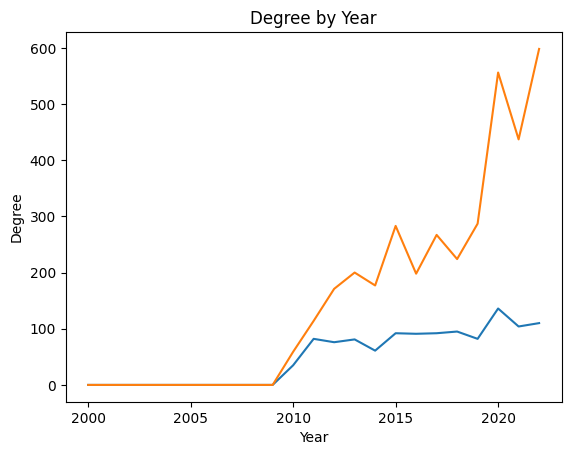

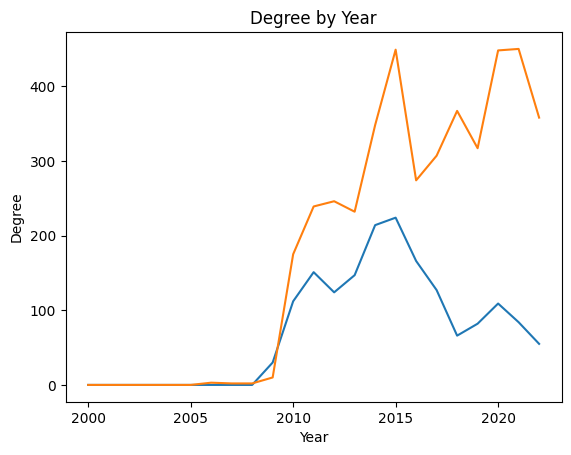

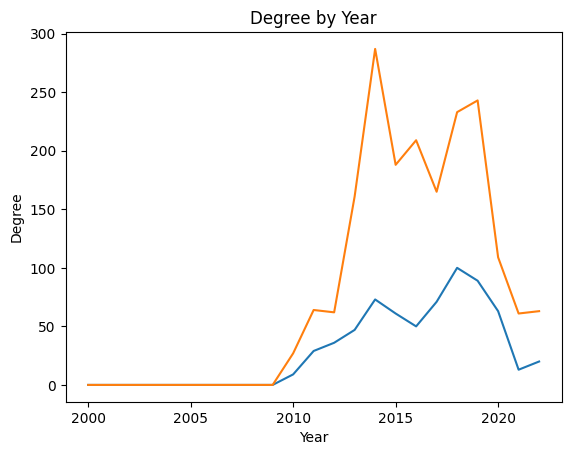

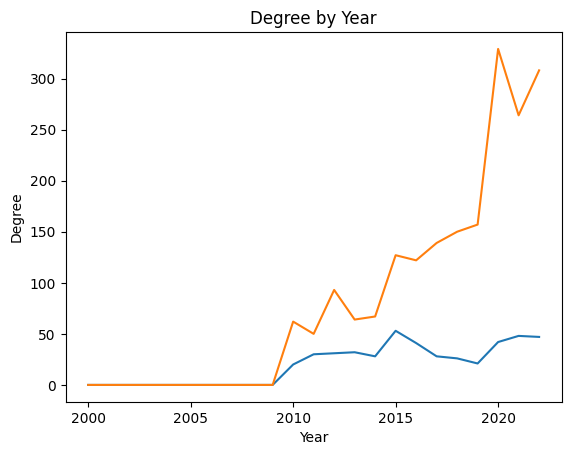

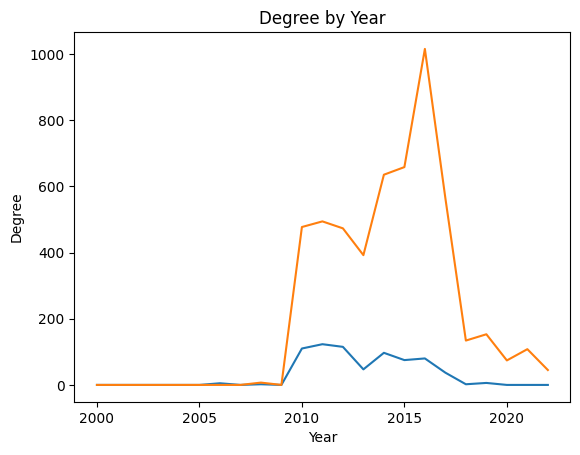

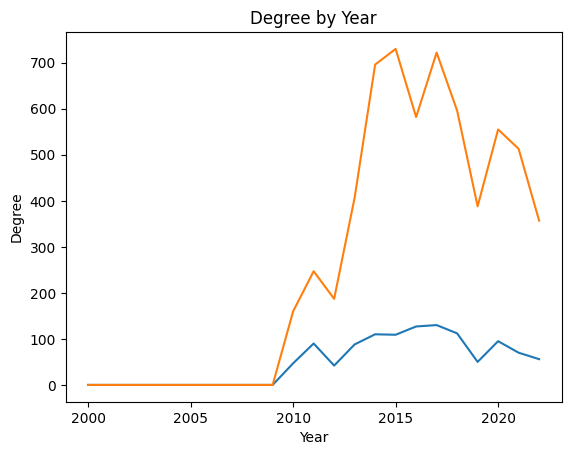

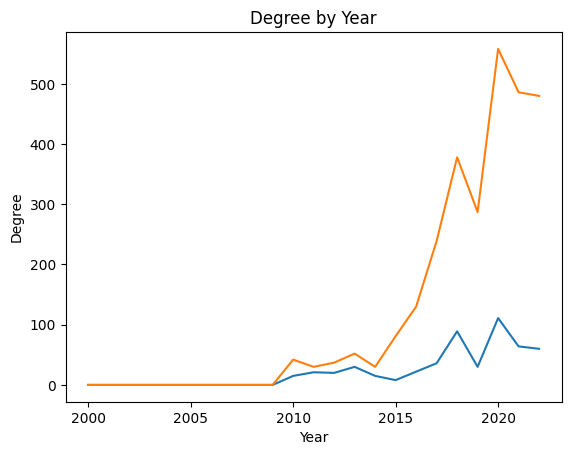

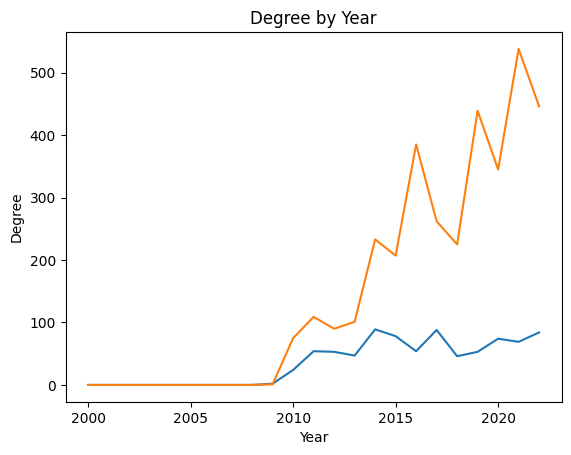

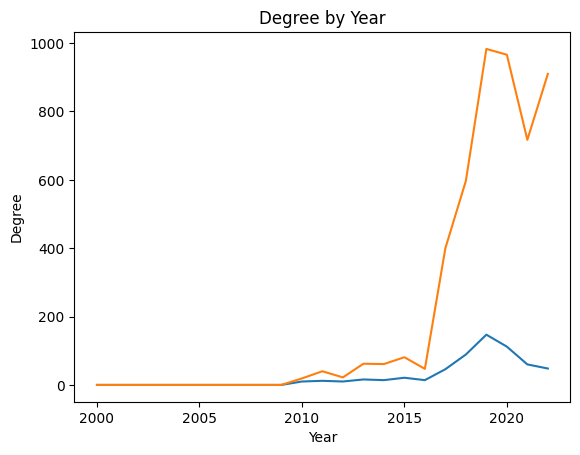

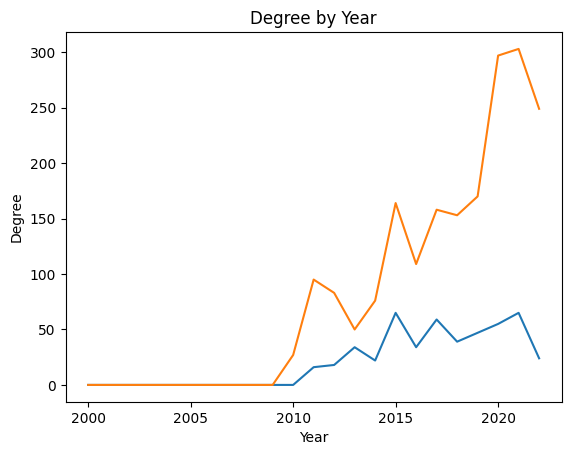

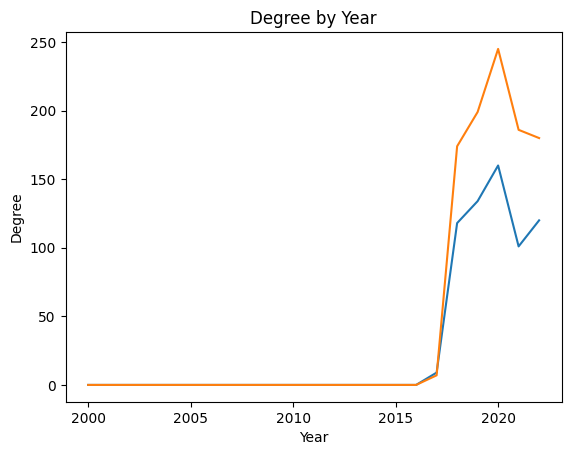

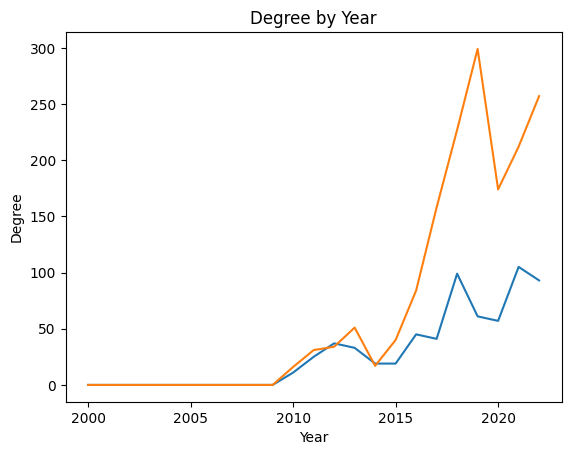

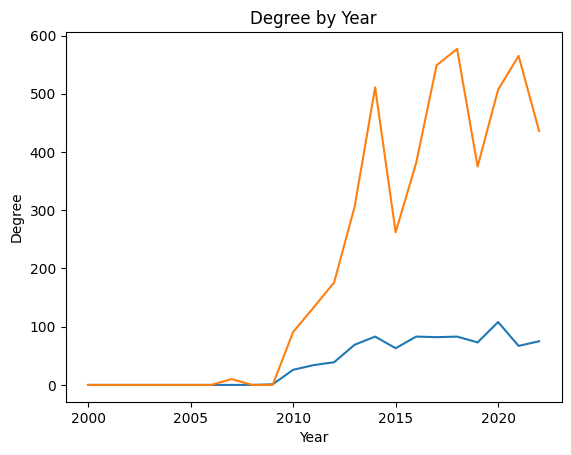

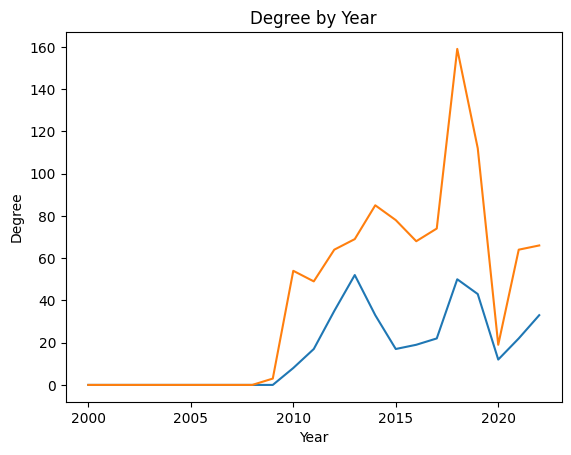

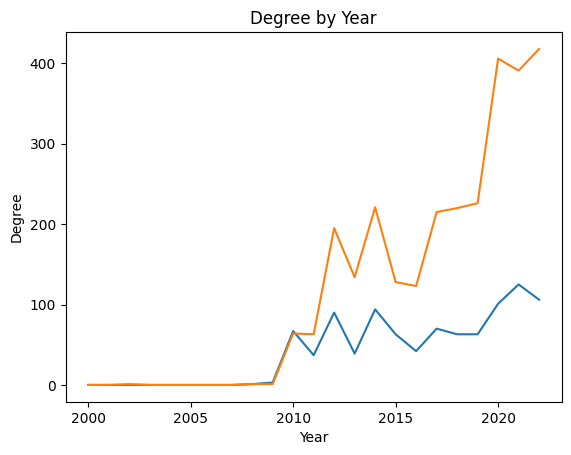

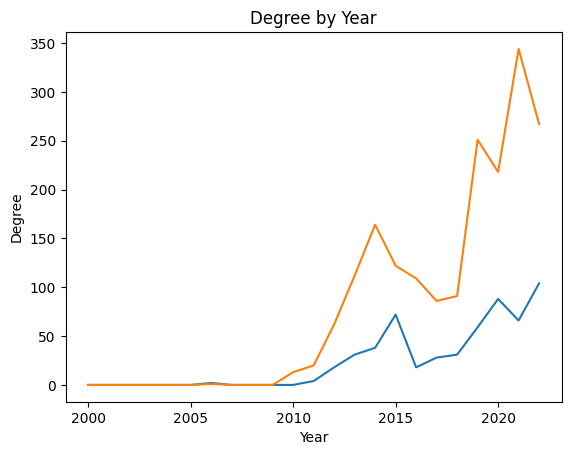

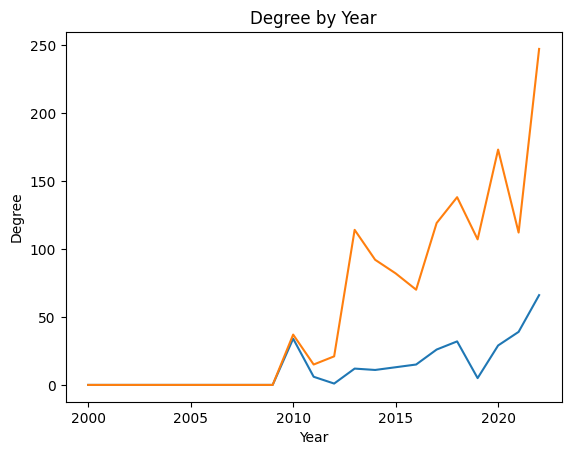

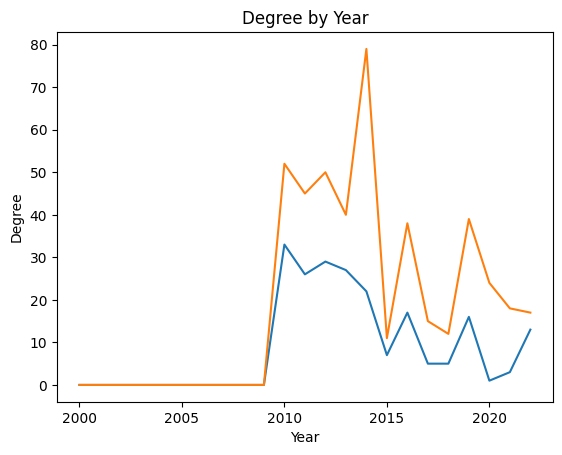

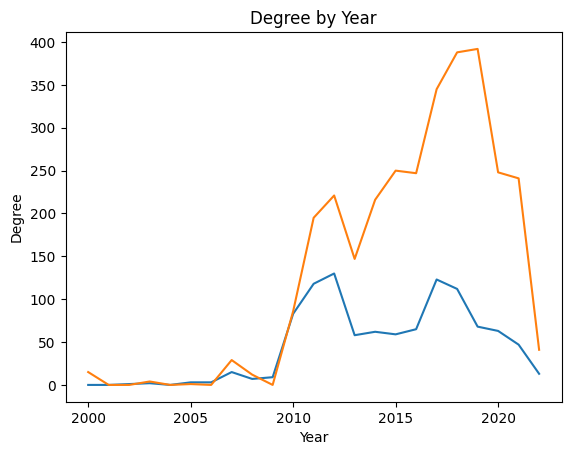

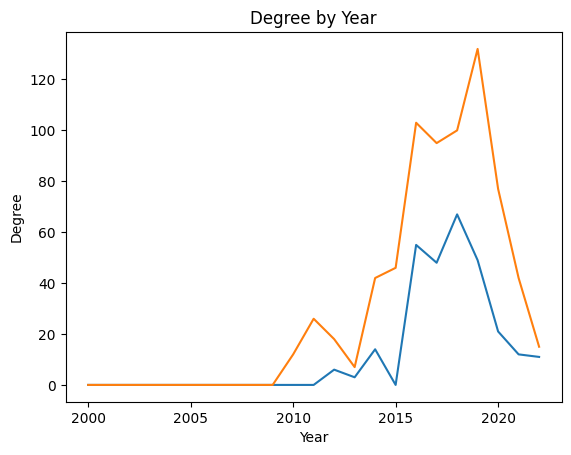

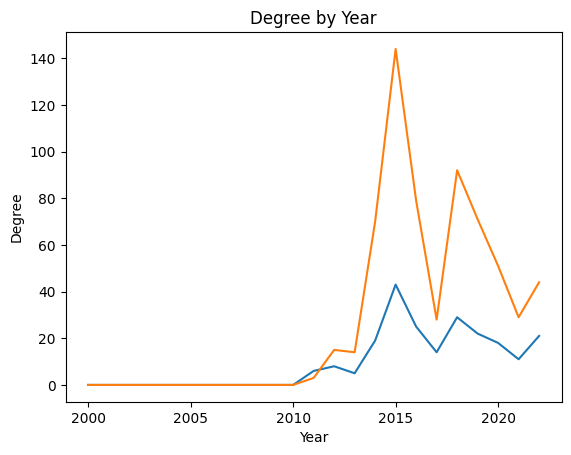

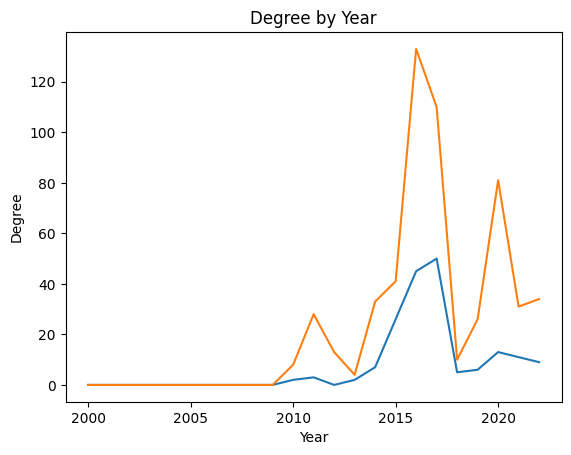

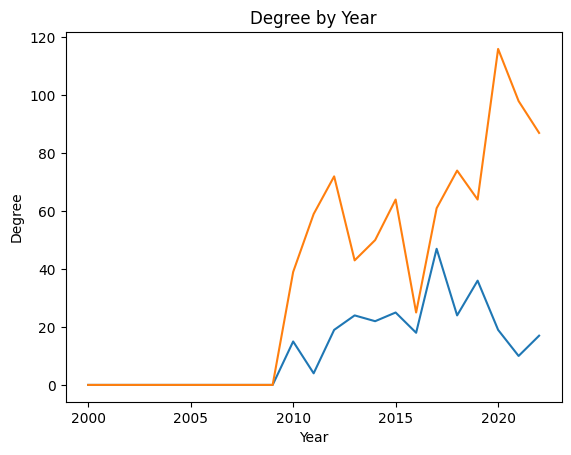

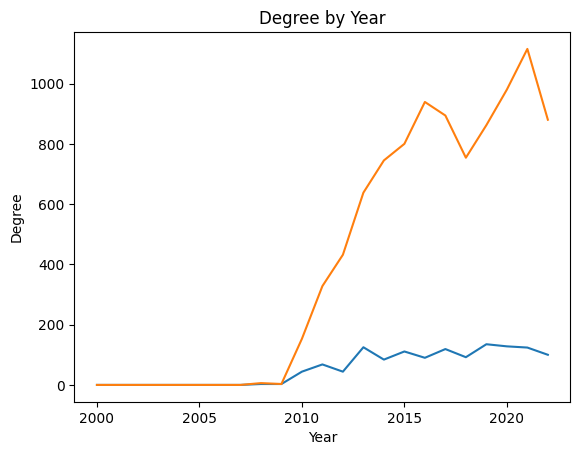

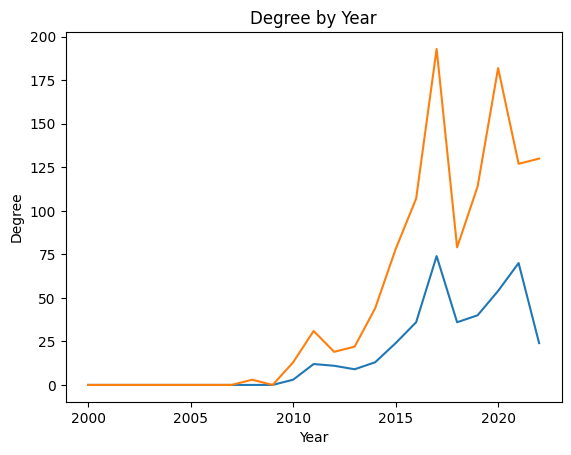

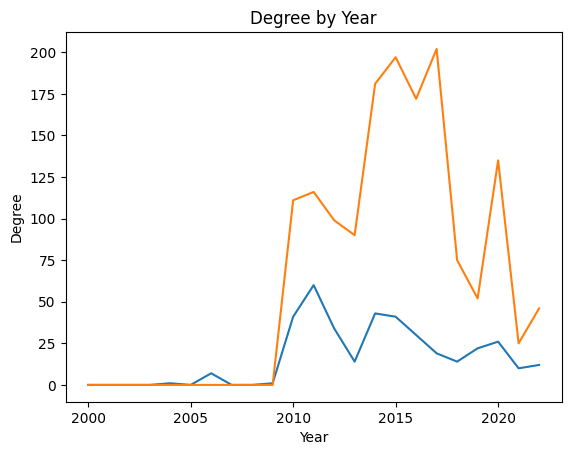

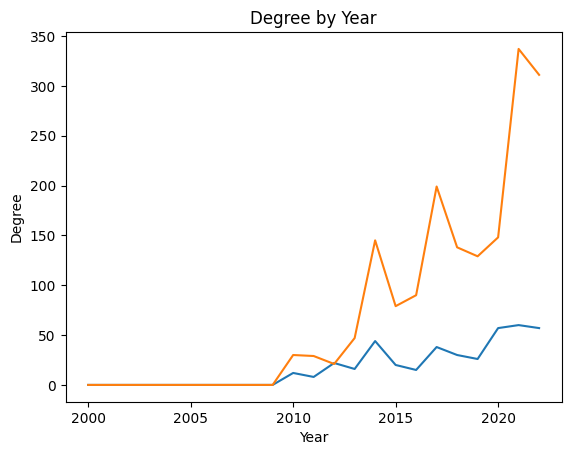

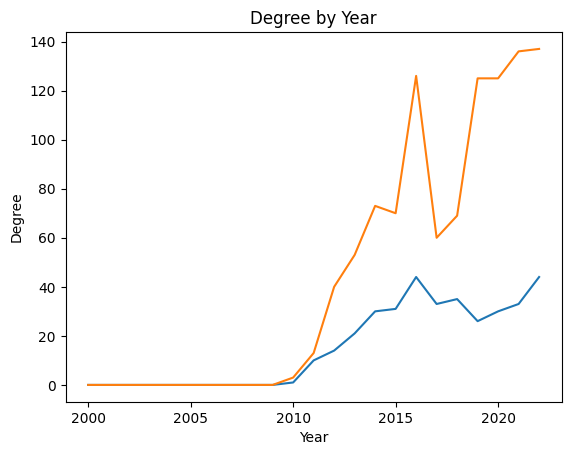

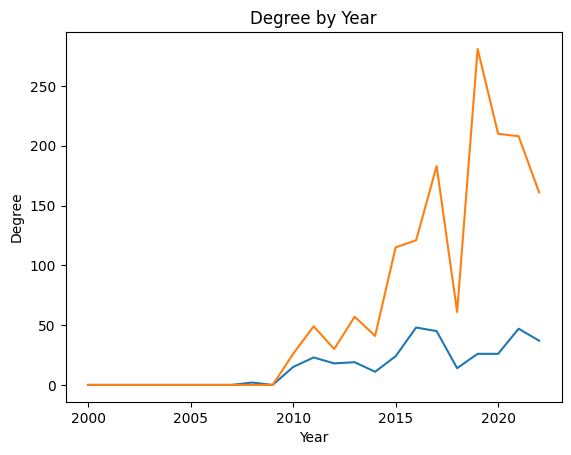

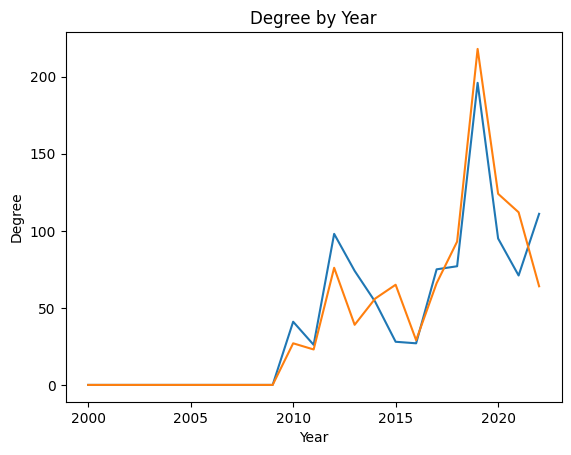

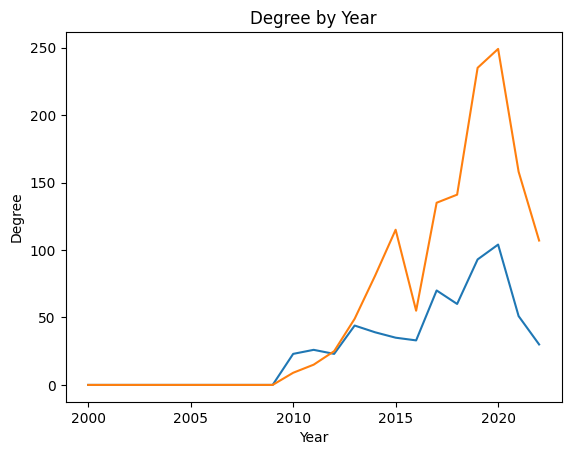

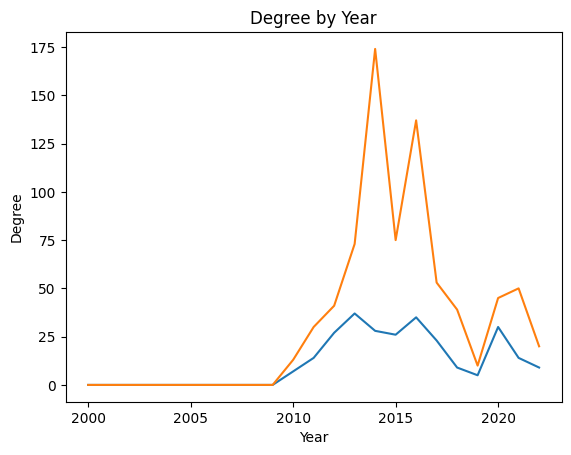

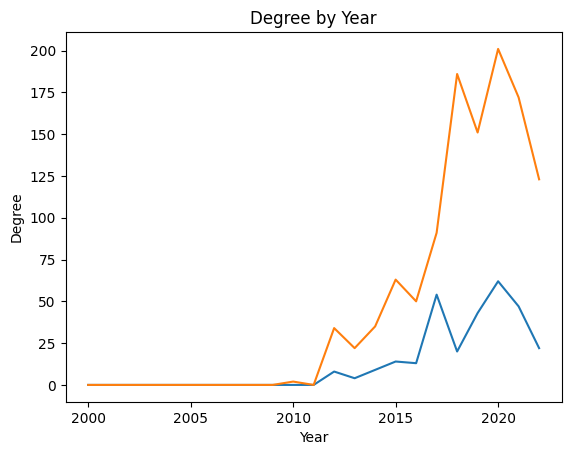

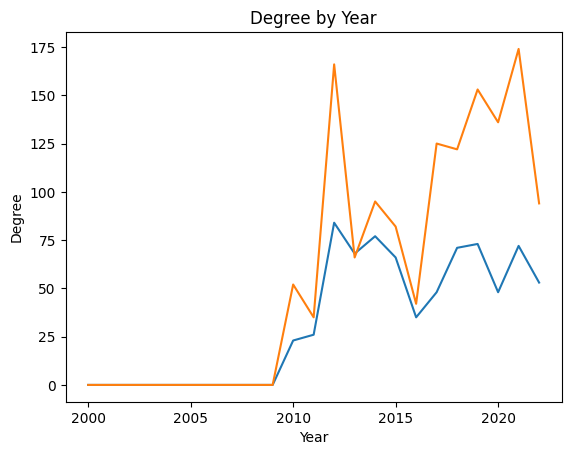

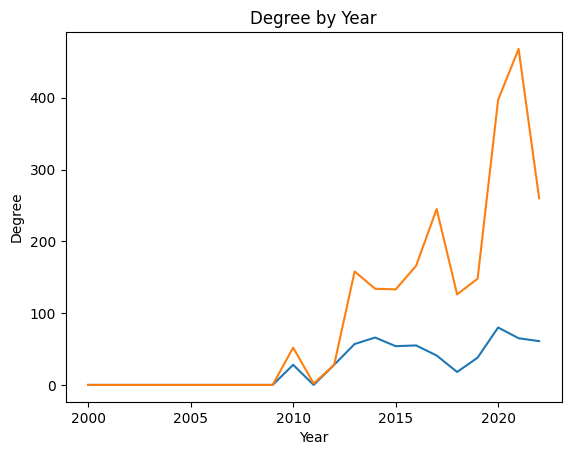

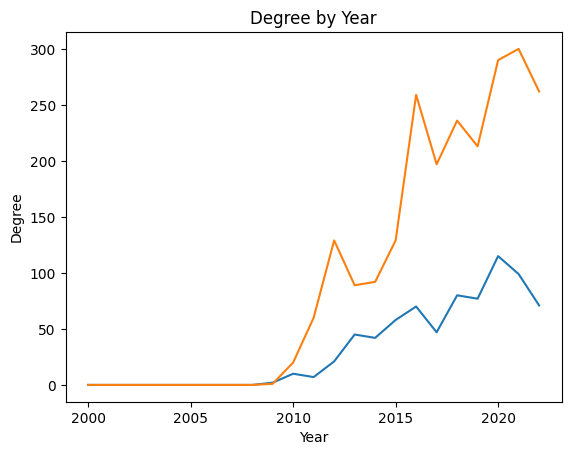

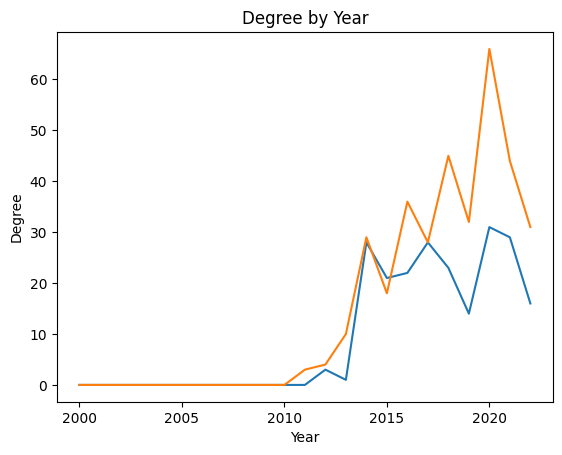

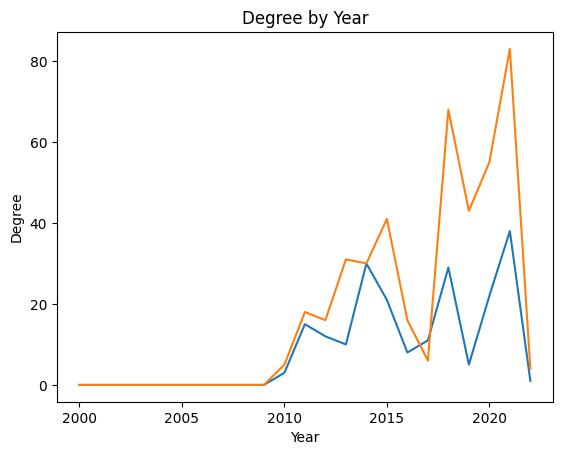

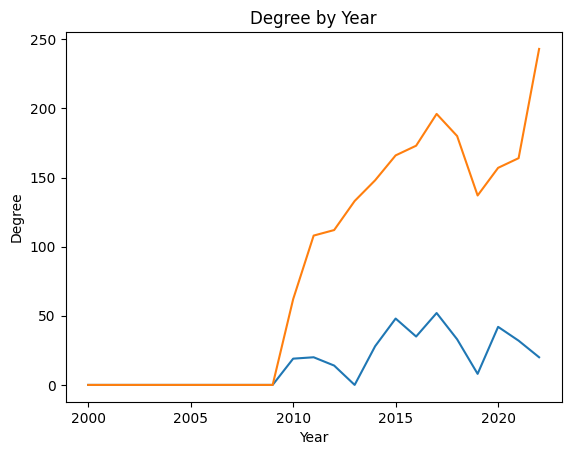

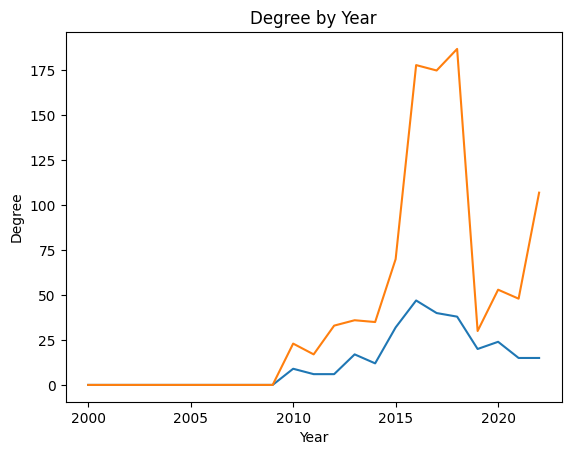

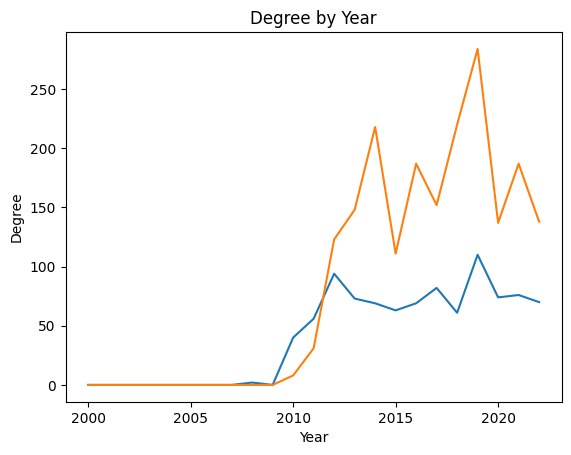

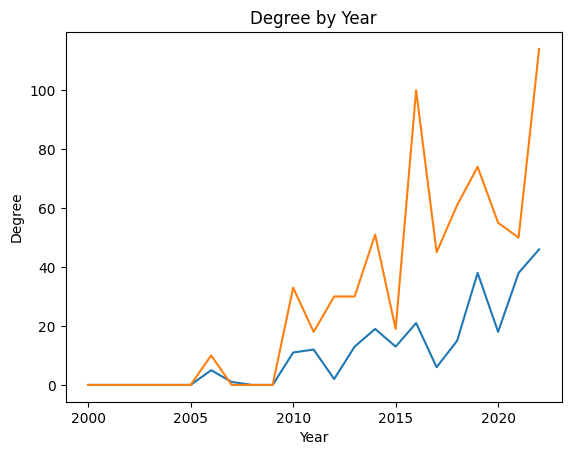

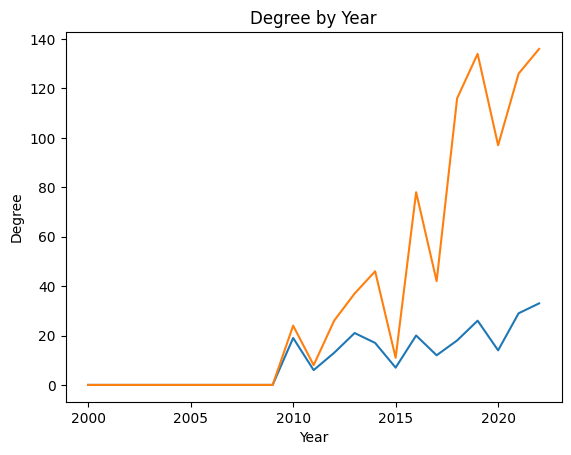

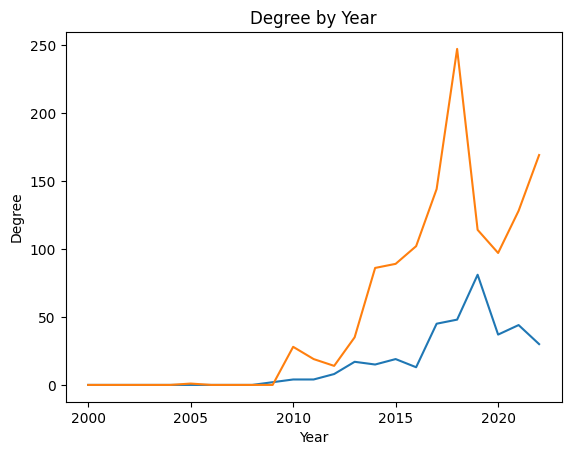

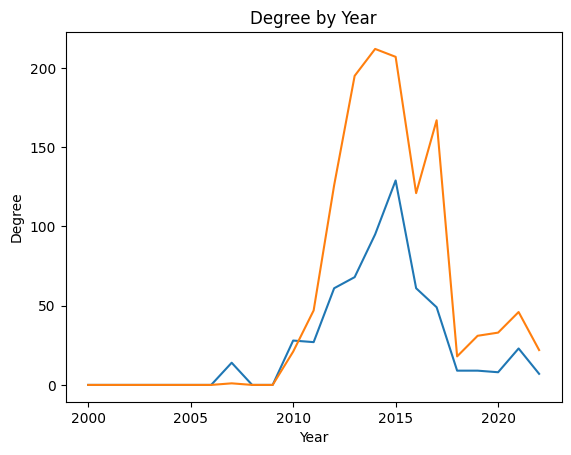

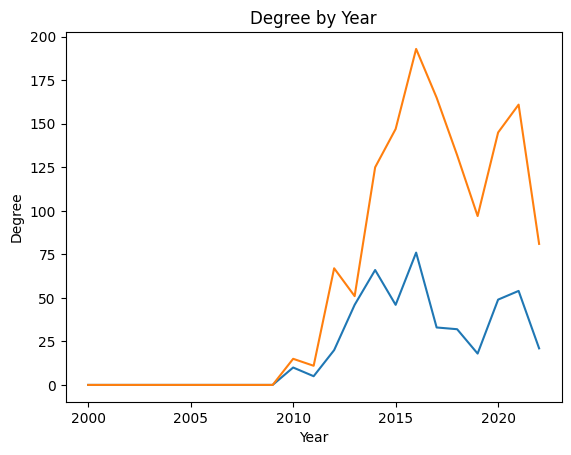

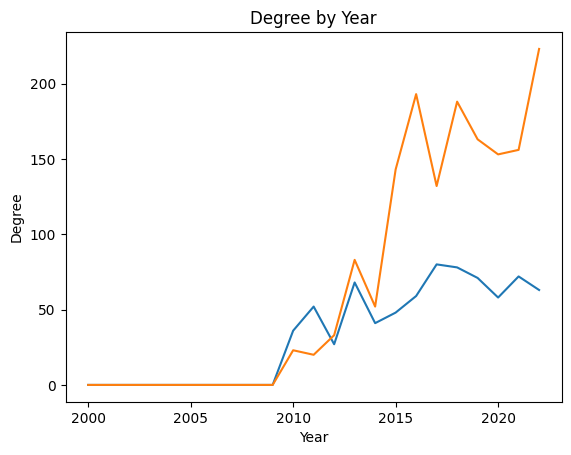

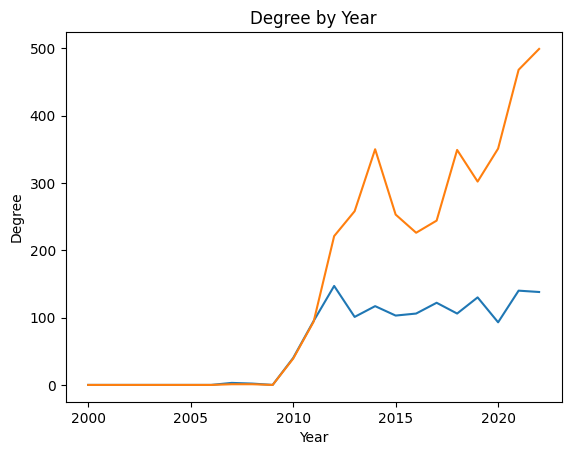

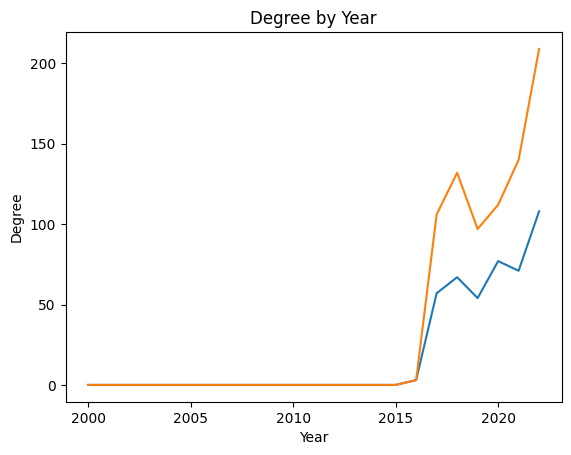

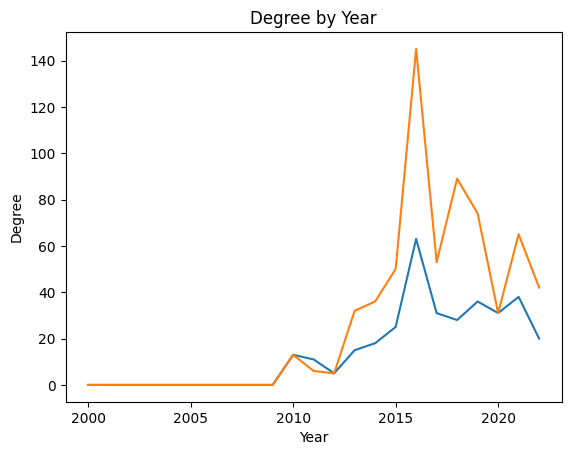

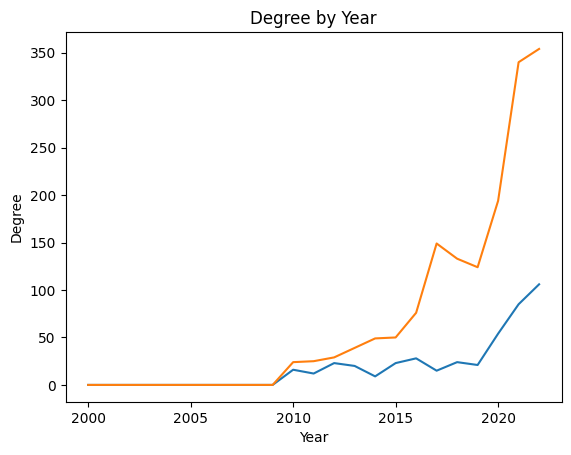

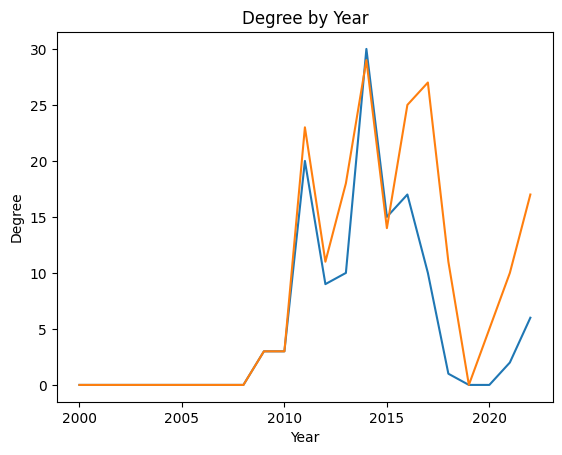

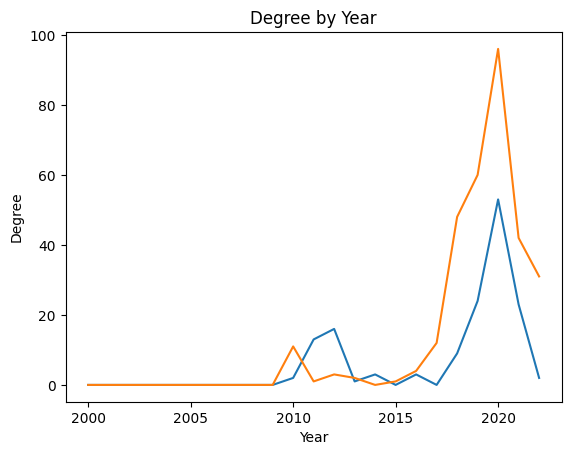

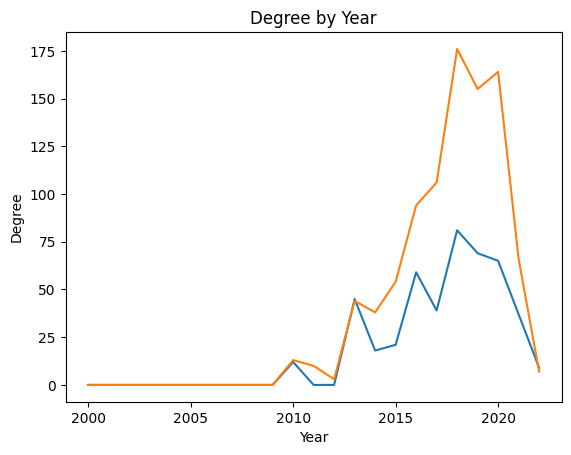

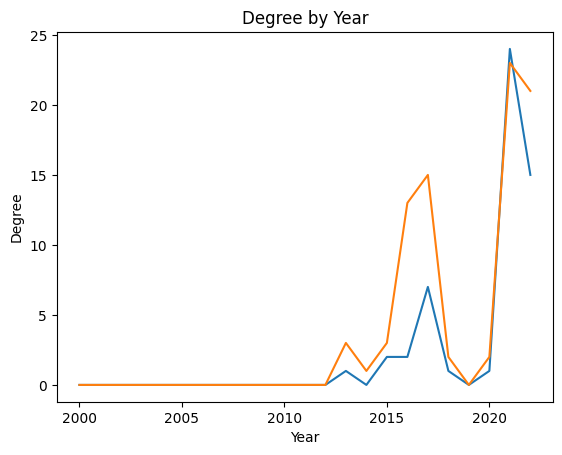

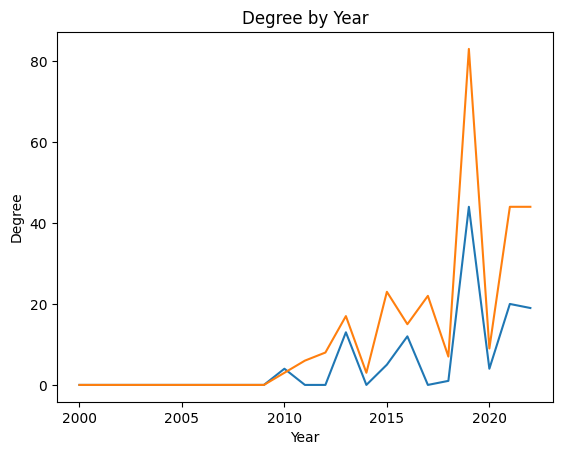

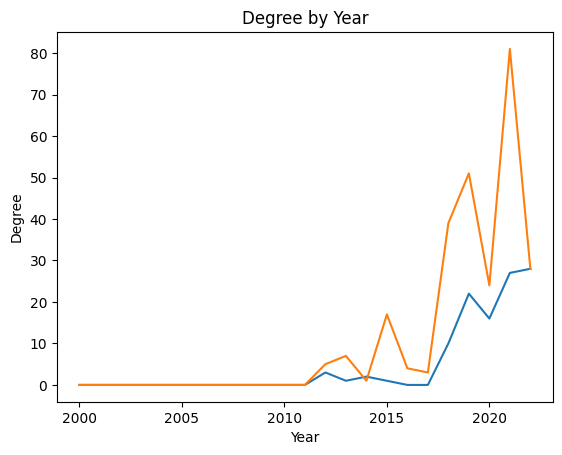

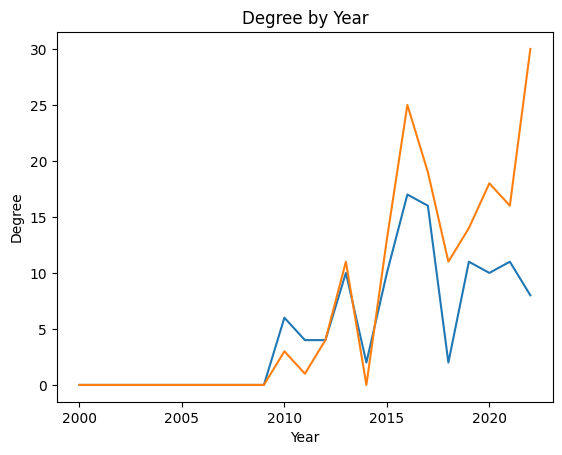

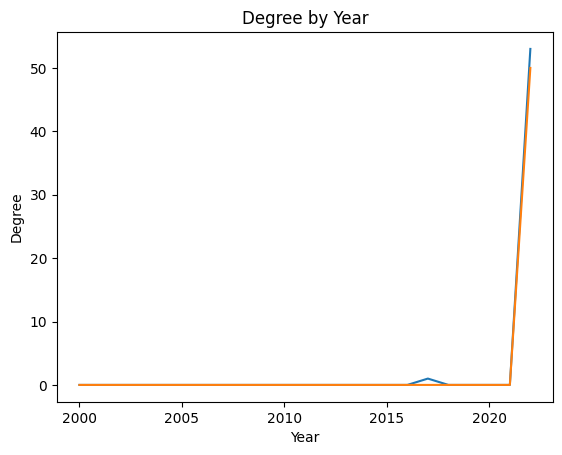

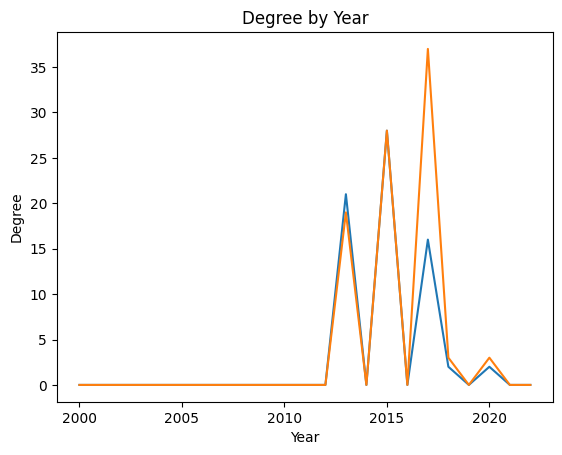

In [28]:
# 对于各个value，打印degree_by_year_sum的折线图
import matplotlib.pyplot as plt

# Iterate over each value in degree_by_year_sum
for community in degree_by_year_sum.keys():
    # Plot the line graph
    plt.plot(range(2000, 2023), degree_by_year_sum[community])
    plt.plot(range(2000,2023), community_edges_by_year[community])

    # Add labels and title to the graph
    plt.xlabel('Year')
    plt.ylabel('Degree')
    plt.title('Degree by Year')

    # Display the graph
    plt.show()


In [40]:
# 获取社区中度数最大的n个节点
n = 1
average = [0] *10
for n in range(1, 10):
    top_n_nodes = {}
    for community in communities.keys():
        top_n_nodes[community] = sorted(list(communities[community]), key=lambda x: graph_G.subgraph(communities[community]).degree(x), reverse=True)[:n]
    # 最大n个节点的度数随年份的变化
    degree_by_year = {}
    for community in communities.keys():
        degree_by_year[community] = {}
        for year in [2000+i for i in range(23)]:
            for node in top_n_nodes[community]:
                if node in graph_G.year(year):
                    if name_list[node] not in degree_by_year[community]:
                        degree_by_year[community][name_list[node]] = [0]*23
                    degree_by_year[community][name_list[node]][year-2000] = graph_G.year(year).degree(node)

    # 将degree_by_year中同一社区中不同作者的数组相加
    degree_by_year_sum = {}
    for community in degree_by_year.keys():
        degree_by_year_sum[community] = [0]*23
        for tmp in degree_by_year[community].values():
            for i in range(len(tmp)):
                degree_by_year_sum[community][i] += tmp[i]

    from scipy.stats import pearsonr
    from statistics import mean

    # 对于每一个community，计算degree_by_year_sum和community_edges_by_year的相关度
    correlations = {}
    for community in degree_by_year_sum.keys():
        correlation, _ = pearsonr(degree_by_year_sum[community][10:], community_edges_by_year[community][10:])
        correlations[community] = correlation
    average[n-1] = mean(list(correlations.values()))
average = average[0:-1]
average

[0.5580115076409689,
 0.6493590744097624,
 0.7056963731718026,
 0.7398541814802301,
 0.7654146331101328,
 0.7924313897984782,
 0.8155380937381534,
 0.8258670915098599,
 0.8318835219246496]

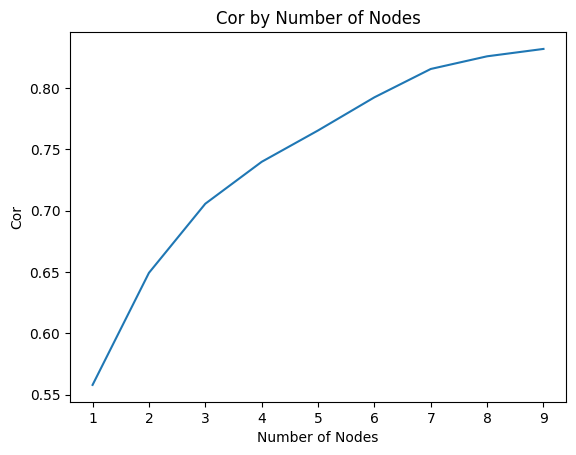

In [41]:
# 画出average的折线图
import matplotlib.pyplot as plt

# Plot the line graph
plt.plot(range(1, len(average)+1), average)

# Add labels and title to the graph
plt.xlabel('Number of Nodes')
plt.ylabel('Cor')
plt.title('Cor by Number of Nodes')

# Display the graph
plt.show()
